In [42]:
import numpy as np
import pandas as pd 
import torch
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import torch.nn.functional as F
from torch.autograd import Variable
import warnings
warnings.filterwarnings(action='ignore')
import os

# Making a random features vector and making random weight and bias for the fuction to be pedicted

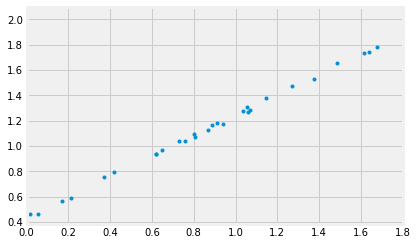

In [43]:
X = np.random.rand(30,1)*2.0
w = np.random.rand(2,1)

y = X*w[0] + w[1] + np.random.rand(30,1)*0.05

marker = '.'
plt.plot(X, y, marker)
#plt.legend()
plt.xlim(0, 1.8)
plt.show()

# Initializing weight and bias with random numbers and defining our model 

In [44]:
W = Variable(torch.rand(1,1),requires_grad=True)
b = Variable(torch.rand(1),requires_grad=True)

def linear(x):
    return torch.matmul(x,W) + b

# Time for traning and visualizing the result 

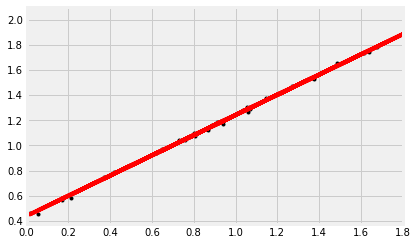

In [50]:
Xt = Variable(torch.from_numpy(X)).float()
yt = Variable(torch.from_numpy(y)).float()

for epoch in range(2500):
    y_pred = linear(Xt)
    
    loss = torch.mean((y_pred-yt)**2)
    
    loss.backward()
    
    W.data = W.data - 0.005*W.grad.data
    b.data = b.data - 0.005*b.grad.data
    
    W.grad.data.zero_()
    b.grad.data.zero_()

W_fin = W.data.numpy()
b_fin = b.data.numpy()

Y_pred = X*W_fin + b_fin
marker = '.'
plt.plot(X, y, marker,color='black')
plt.plot(X, Y_pred, color='red')
#plt.legend()
plt.xlim(0, 1.8)
plt.show()